<a href="https://colab.research.google.com/github/bvks2020sameer/audio-analysis/blob/main/Audioprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library import

In [ ]:
!pip install pysoundfile
!pip install bitstring
!pip install matplotlib


Donot touch this 

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/colab resources/highway intro.wav

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving song.wav to song.wav
User uploaded file "song.wav" with length 690380 bytes


**Library Import**

In [28]:
import wave
import numpy as np
import math
import IPython as I
from matplotlib import pyplot as plt

**Main Program**

In [29]:
def comp_cast(n):
  a = n.real
  b = n.imag
  phase = math.tan(b/a)
  res = ((a**2+b**2)**0.5)*phase
  return res
comp_cast(4+3j)


4.657982299720363

In [31]:

wav = wave.open("song.wav","r")
raw = (wav.readframes(-1))
raw = np.frombuffer(raw,"Int16")
samp = wav.getframerate()
if wav.getnchannels == 2:
  print("Stereo NOT supported")
  sys.exit()
wav.close()
Time = np.linspace(0,len(raw)/samp,len(raw))
ffty = np.fft.fft(raw)

n = int(0.001*len(ffty))
ft = ffty[n:len(ffty)-n]
ft = [comp_cast(x) for x in ft]
mod = np.fft.ifft(ft)
I.display.Audio(mod,rate = 22000)







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


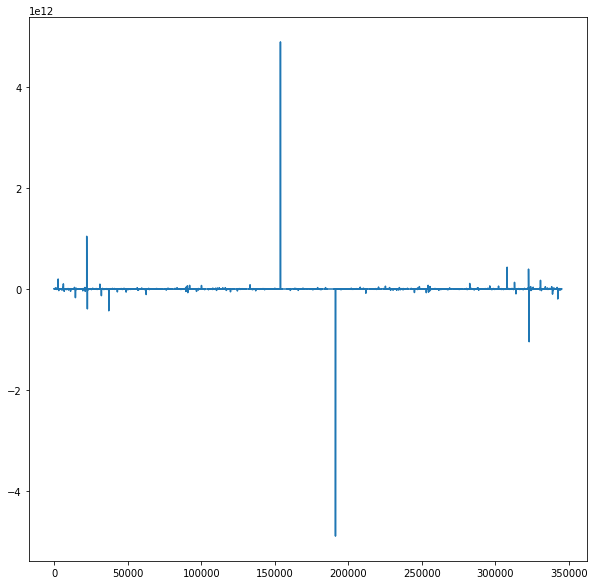

[ 46252574.01929066-46582636.33512434j
 -10929793.35041772-54959256.19592489j
 -26072437.9269458 -14140374.47556225j ...
  16077221.29372271 -3492600.90269087j
 -26072437.9269458 +14140374.47556225j
 -10929793.35041774+54959256.19592492j]


In [32]:
ffty = [comp_cast(x) for x in ffty]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(ffty)
plt.show()
print(ft)

*Test Audio* 

In [5]:
import IPython
IPython.display.Audio("song.wav")